In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pl
import seaborn as sns
import scipy.stats as stats

### Hersteltijd Voorspellen 

![1](1.png) 
De doelstelling van het project is om de planners te helpen om de hervatting van het treinverkeer te organiseren. In de praktijk blijkt dat de voorspellingen van de monteurs vaak te pessimistisch zijn. De vraag van ProRail en de planners van de NS is of op basis van de data een betere voorspelling te maken is waardoor de dienstregeling sneller hervat kan worden
 

## Onderzoekvraag  
 

## Data Understanding 



In [54]:
df = pd.read_csv('sap_storing_data_hu_project.csv') #complete ste
pd.set_option('display.max_rows', df.shape[0]+1) #max aantal rows 

C:\Users\hasso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df.shape #shape

(898526, 140)

In [11]:
df.head() 

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_mon_begin_ddt,stm_sap_meldtekst,stm_mon_toelichting_trdl,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2014,07/05/2014 05:30:12,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,34415,3617016,07/05/2014 05:44:24,0
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,NaN,Logboeknr Geeltje : 49 Tijd: 0900,NaN,...,1,2006,02/01/2006 09:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704590,13/06/2013 13:37:52,0
2,2,50053213,48.0,GN,02/01/2006 12:35:00,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-P,NaN,...,1,2006,02/01/2006 12:35:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704591,13/06/2013 13:37:52,0
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-P,NaN,...,1,2006,02/01/2006 16:40:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704592,13/06/2013 13:37:52,0
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-P,NaN,...,1,2006,02/01/2006 22:30:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704593,13/06/2013 13:37:52,0


In [14]:
df.dtypes

Unnamed: 0                          object
#stm_sap_meldnr                      int64
stm_mon_nr                         float64
stm_vl_post                         object
stm_sap_meld_ddt                    object
stm_sap_mon_meld_ddt                object
stm_sap_meldtekst_lang              object
stm_mon_begin_ddt                   object
stm_sap_meldtekst                   object
stm_mon_toelichting_trdl            object
stm_oh_pg_mld                       object
stm_geo_mld                         object
stm_geo_mld_uit_functiepl          float64
stm_equipm_nr_mld                  float64
stm_equipm_soort_mld                object
stm_equipm_omschr_mld               object
stm_km_van_mld                     float64
stm_km_tot_mld                     float64
stm_prioriteit                     float64
stm_scenario_mon                    object
stm_status_melding_sap              object
stm_mon_nr_status_omschr            object
stm_mon_nr__statuscode             float64
stm_mon_nr_

In [15]:
df.columns

Index(['Unnamed: 0', '#stm_sap_meldnr', 'stm_mon_nr', 'stm_vl_post',
       'stm_sap_meld_ddt', 'stm_sap_mon_meld_ddt', 'stm_sap_meldtekst_lang',
       'stm_mon_begin_ddt', 'stm_sap_meldtekst', 'stm_mon_toelichting_trdl',
       ...
       'stm_rapportage_maand', 'stm_rapportage_jaar', 'stm_x_bron_publ_dt',
       'stm_x_bron_bestandsnaam', 'stm_x_bron_arch_dt', 'stm_x_actueel_ind',
       'stm_x_run_id', 'stm_x_bk', 'stm_x_start_sessie_dt',
       'stm_x_vervallen_ind'],
      dtype='object', length=140)

In [52]:
df.describe().T #idk waarom !! 

,count,mean,std,min,25%,50%,75%,max
#stm_sap_meldnr,898526.0,7.510690e+07,1.113009e+07,0.0,80354715.25,80636154.5,80790294.75,1.000000e+08
stm_mon_nr,898525.0,9.163174e+05,1.588361e+06,0.0,0.00,0.0,1404624.00,5.748960e+06
stm_geo_mld_uit_functiepl,884926.0,3.350056e+02,2.749061e+02,0.0,85.00,208.0,551.00,9.520000e+02
stm_equipm_nr_mld,661126.0,1.064512e+07,4.748398e+05,10000012.0,10220276.00,10596349.5,10957693.00,3.039590e+07
stm_km_van_mld,898522.0,3.536605e+04,2.294758e+05,0.0,0.00,17029.0,44630.00,6.084449e+07
stm_km_tot_mld,898522.0,1.594005e+04,4.969935e+04,0.0,0.00,0.0,15142.00,4.221399e+06
stm_prioriteit,898365.0,4.582593e+00,2.262522e+00,1.0,2.00,4.0,5.00,9.000000e+00
stm_mon_nr__statuscode,326841.0,4.489137e+00,2.911721e+00,0.0,2.00,6.0,7.00,9.000000e+00
stm_geo_gst_uit_functiepl,741568.0,3.214555e+02,2.706875e+02,0.0,79.00,203.0,545.00,9.520000e+02
stm_equipm_nr_gst,605721.0,1.062666e+07,4.755891e+05,10000012.0,10211723.00,10564523.0,10927784.00,3.039590e+07


In [20]:
geo = pd.read_csv('geocodes.csv',error_bad_lines=False) #Train traject  

b'Skipping line 309: expected 1 fields, saw 2\n'


In [21]:
geo

,Code;Traject
0,1;Harlingen Haven - Leeuwarden
1,2;Leeuwarden - Groningen
2,3;Groningen Losplaats - Waterhuizen Aansl.
3,4;Waterhuizen Aansl. - Zuidbroek
4,5;Zuidbroek - Nieuweschans Grens
5,6;Groningen - Sauwerd
6,7;Sauwerd - Winsum
7,8;Leeuwarden - Stavoren
8,9;Meppel - Leeuwarden
9,10;Haren - Groningen Losplaats


In [46]:
oorzaak = pd.read_csv('Oorzaakcodes.csv',error_bad_lines=False) #Oorzaak code 
oorzaak

b'Skipping line 8: expected 1 fields, saw 2\nSkipping line 68: expected 1 fields, saw 3\n'


,Code;Oorzaak
0,131;Uitloop treinvrije periode
1,132;Ongepland werk
2,133;Werkzaamheden
3,134;Aanrijding (bijna) tijdens werkzaamheden
4,141;Bijna aanrijding met wegverkeer
5,142;Bijna aanrijding met persoon langs baan
6,144;Openrijden/kapotrijden
7,152;Aanrijding met wegverkeer
8,153;Aanrijding met personen langs de baan
9,146;Vreemd voorwerp


In [53]:

df['stm_geo_mld'][:5] #train traject code 

0      NaN
1    133.0
2    143.0
3    142.0
4    142.0
Name: stm_oorz_code, dtype: float64

In [30]:
df['stm_oorz_code'][:5] #Oorzaak 

0    NaN
1    624
2    201
3     25
4     12
Name: stm_geo_mld, dtype: object

In [31]:
df['stm_oh_pg_gst'][:5] #Contract gebied storing + aanduiding techniekveld

0    NaN
1    81S
2    37B
3    32B
4    35B
Name: stm_oh_pg_gst, dtype: object

In [37]:
cg = pd.read_excel('Contractgebiedcodes.xlsx') #Contract gebied storing
cg

,Contractgebied,Code
0,Rijn en Gouwe,1
1,Rijn en Gouwe,81
2,Den Haag,2
3,Rotterdam,3
4,Zee - Zevenaar,4
5,Zee - Zevenaar,71
6,Dordrecht,5
7,Hollands Noorderkwartier,6
8,Hollands Noorderkwartier,7
9,Haarlem,8


In [40]:
tchv = pd.read_csv('techniekvelden.csv',error_bad_lines=False) #aanduiding techniekveld
tchv

,Techniekveld OH plangroep;Letter
0,Seinwezen;S
1,Baan;B
2,Telecom;T
3,Energievoorziening;E
4,Gebouwen;G
5,Kunstwerken;K
6,Operationeel beheer;O
7,Ondergrondse infra;I
8,Post 21;P
9,ATM;A


## Status van herstel

1. Volledig Functieherstel, alleen vermelden als er geen afwijkingenmeer zijn van de ontworpen functionaliteit van het infraobject en welhandelingen zijn verricht; 
------------------------------------
2. Tijdelijk Functieherstel, verdere werkzaamheden benodigd op eenlater tijdstip en de Infrastructuur is zonder beperkingen te gebruiken;Vervolgacties worden in het reguliere onderhoud uitgevoerd.
------------------------------------
3. Gedeeltelijk Functieherstel, Infrastructuur is met beperkingen tegebruiken, verdere werkzaamheden op een later tijdstip (telefonischafstemmen voor een akkoordverklaring met de MKS) en er wordenafspraken gemaakt omtrent het definitieve herstel. Hiervoor wordt eenrelatie RVO aangemaakt. 
------------------------------------
4. Geen functieherstel, Infrastructuur voldoet aan de eisen geenherstel nodig. 
------------------------------------
5. Geen functieherstel, infrastructuur voldoet niet aan de eisen welherstel nodig. De MKS maakt een relatie RVO aan t.b.v. hetstoringsherstel en sluit de huidige RVO af door het loggen van eindestoring.

-------------------------------------

In [48]:
df['stm_fh_status'][:5] #Status van herstel vam 1 tot 5 staat boven uitgelegd 

0    NaN
1    4.0
2    4.0
3    4.0
4    4.0
Name: stm_fh_status, dtype: float64

In [59]:
df['stm_sap_storeinddatum'][:5] #einde storing datum 


0           NaN
1    02/01/2006
2    02/01/2006
3    02/01/2006
4    02/01/2006
Name: stm_sap_storeinddatum, dtype: object

In [58]:
df['stm_sap_storeindtijd'][:5] #einde storing tijd !

0         NaN
1    09:00:00
2    13:26:00
3    17:20:00
4    22:36:00
Name: stm_sap_storeindtijd, dtype: object

In [61]:
df['stm_aanngeb_dd'][:5] #Datum aannemer gebeld

0           NaN
1    02/01/2006
2    02/01/2006
3    02/01/2006
4    02/01/2006
Name: stm_aanngeb_dd, dtype: object

In [62]:
df['stm_aanngeb_tijd'][:5] #Tijdstip aannemer gebeld

0         NaN
1    09:00:00
2    12:35:00
3    16:40:00
4    22:30:00
Name: stm_aanngeb_tijd, dtype: object

In [63]:
df['stm_aanntpl_dd'][:5] #Datum aannemer ter plaatse

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: stm_aanntpl_dd, dtype: object

In [113]:
df['stm_aanntpl_tijd'][:500] #Tijdstip aannemer ter plaatse

0           NaN
1      00:00:00
2      00:00:00
3      00:00:00
4      00:00:00
5      00:00:00
6      00:00:00
7      00:00:00
8      00:00:00
9      00:00:00
10     00:00:00
11     00:00:00
12     00:00:00
13     00:00:00
14     00:00:00
15     00:00:00
16     00:00:00
17     00:00:00
18     00:00:00
19     00:00:00
20     00:00:00
21     00:00:00
22     00:00:00
23     00:00:00
24     00:00:00
25     00:00:00
26     00:00:00
27     00:00:00
28     00:00:00
29     00:00:00
30     00:00:00
31     00:00:00
32     00:00:00
33     00:00:00
34     00:00:00
35     00:00:00
36     00:00:00
37     00:00:00
38     00:00:00
39     00:00:00
40     00:00:00
41     00:00:00
42     00:00:00
43     00:00:00
44     00:00:00
45     00:00:00
46     00:00:00
47     00:00:00
48     00:00:00
49     00:00:00
50     00:00:00
51     00:00:00
52     00:00:00
53     00:00:00
54     00:00:00
55     00:00:00
56     00:00:00
57     00:00:00
58     00:00:00
59     00:00:00
60     00:00:00
61     00:00:00
62     0

In [78]:
df['stm_fh_duur'][:5] #Duur van functiehersteltijd

0     NaN
1     0.0
2    51.0
3    40.0
4     6.0
Name: stm_fh_duur, dtype: float64

In [102]:
df['zscore_stm_fh_duur'] = (df.stm_fh_duur - df.stm_fh_duur.mean())/ df.stm_fh_duur.std(ddof=0)

In [105]:
df['zscore_oorzaak'] = (df.stm_oorz_code - df.stm_oorz_code.mean())/df.stm_oorz_code.std(ddof=0)

In [103]:
df['zscore_stm_fh_duur'][:20]

0          NaN
1    -0.144140
2    -0.136177
3    -0.137894
4    -0.143203
5    -0.143047
6    -0.142110
7    -0.141798
8    -0.139455
9    -0.144140
10   -0.144140
11   -0.139612
12   -0.144140
13   -0.140392
14   -0.143984
15   -0.135864
16   -0.125403
17   -0.142422
18   -0.138206
19   -0.141173
Name: zscore_stm_fh_duur, dtype: float64

<AxesSubplot:xlabel='zscore_oorzaak', ylabel='zscore_stm_fh_duur'>

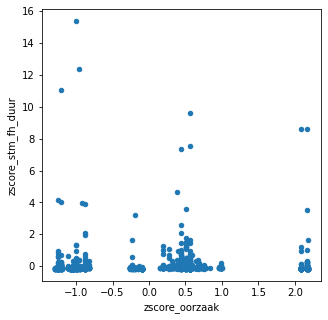

In [112]:
x = 'zscore_oorzaak' #Zscore of oorzaak code 
y = 'zscore_stm_fh_duur' #Zscore of Duur van functiehersteltijd 

#deelverzameling van data om te de gehele te vertegenwoorden
deelverzameling = df.sample(2000)[[x, y]]
deelverzameling.sort_values(['zscore_stm_fh_duur'], ascending=True, inplace=True)
deelverzameling.dropna(inplace=True)

deelverzameling.plot(x=x, y=y, kind='scatter',figsize=(5,5))